In [2]:
# Import base libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import glob
from PIL import Image
import re
import seaborn as sns

In [3]:
# Import the data from the main file(s)
file_path = "C:/Users/colts/OneDrive/Desktop/COMP 4449/Multi-class Weather Dataset"
folders = os.listdir(file_path)
ext = ['jpg','jpeg']

# Folders for modeling
print(folders)

# Collect images and their respective labels
def CollectImages(PATH, folder, image_ext):
    images = []
    for ext in image_ext:
        for file in glob.glob(PATH + "/" + folder + '/*.' + ext):
            # Using Pillow to reshape and convert the images
            images.append(file)

    # Displays number of images in each folder
    print(f"Number of Images in folder {folder}: {len(images)}")
    
    # Shuffles for randomness
    np.random.shuffle(images)
    
    # Returns the list of images along with an index of values that changes each run
    return images, np.array([folder for i in range(len(images))])

['Cloudy', 'Hail', 'Lightning', 'Rain', 'Shine', 'Snow', 'Sunrise']


In [4]:
%%time
# Load in the images
images, added_labels = [], []
images_dict = {}

for file in folders:
    image, label = CollectImages(file_path, file, ext)
    images_dict[file] = label.shape[0]
    images.extend(image)
    added_labels.extend(label)

Number of Images in folder Cloudy: 310
Number of Images in folder Hail: 338
Number of Images in folder Lightning: 323
Number of Images in folder Rain: 337
Number of Images in folder Shine: 255
Number of Images in folder Snow: 325
Number of Images in folder Sunrise: 357
Wall time: 17.7 ms


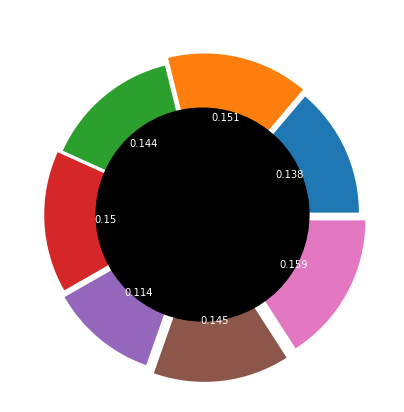

In [5]:
# ------------------------------------------------------------------------ #
# EDA -- NOTE, ALL TEXT WILL BE WHITE DUE TO MY JUPYTER BEING IN DARK MODE #
# ------------------------------------------------------------------------ #
plt.figure(figsize=(12, 7))

# Calculates the percent of the whole
def percent(x):
    val = round(x/100, 3)
    return val

# Create a circle for donut
my_circle = plt.Circle((0,0), 0.7, color='black')

explode_piece = [0.03, 0.06, 0.01, 0.04, 0.06, 0.1, 0.08]
plt.pie(images_dict.values(), labels=images_dict.keys(), textprops=dict(color="w"), 
        explode=explode_piece, autopct=lambda x: percent(x));

plt.title("Distribution of Weather Phenomena", color="White", size=15);

# Add circle to the plot
p = plt.gcf()
p.gca().add_artist(my_circle);

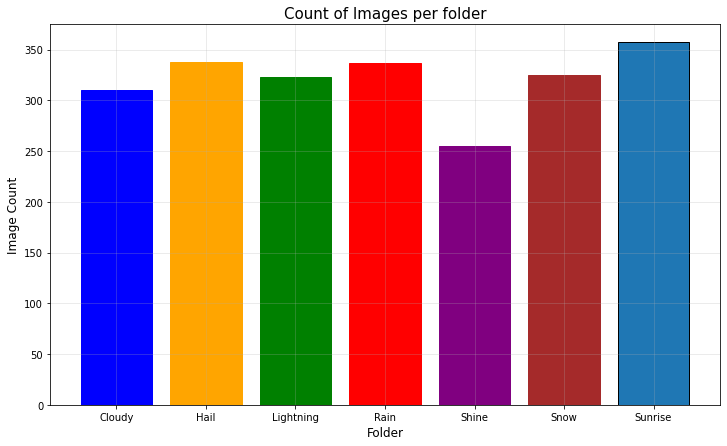

In [6]:
# Create a bar graph to display true count against each
plt.figure(figsize=(12, 7))
bars = plt.bar(images_dict.keys(), images_dict.values(), edgecolor="black")

plt.xlabel("Folder", size=12)
plt.ylabel("Image Count", size=12)
plt.grid(alpha=0.3)
plt.title("Count of Images per folder", size=15);
bars[0].set_color("blue")
bars[1].set_color("Orange")
bars[2].set_color("green")
bars[3].set_color("red")
bars[4].set_color("purple")
bars[5].set_color("brown")

In [7]:
# Data is relatively balanced, no outlying or abnormally large folder counts

In [8]:
# Convert the data to a pandas dataframe
image_paths = pd.Series(images, name='Modified_Image').astype(str)
labels_for_image = pd.Series(added_labels, name='Labels')
image_df = pd.concat([image_paths, labels_for_image], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop=True)

# Display statistics
print(image_df.shape)
print(image_df.size)

(2245, 2)
4490


In [9]:
image_df.head(3)

,Modified_Image,Labels
0,C:/Users/colts/OneDrive/Desktop/COMP 4449/Mult...,Hail
1,C:/Users/colts/OneDrive/Desktop/COMP 4449/Mult...,Rain
2,C:/Users/colts/OneDrive/Desktop/COMP 4449/Mult...,Lightning


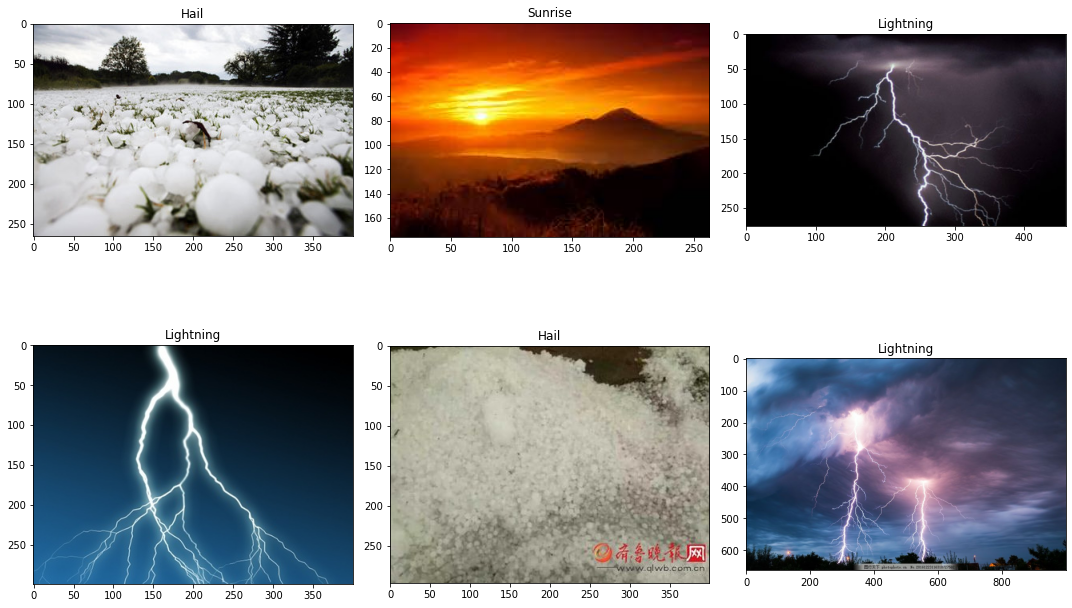

In [10]:
# Display some training images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(plt.imread(image_df["Modified_Image"][0]))
ax[0, 0].set_title(image_df["Labels"][0])

ax[0, 1].imshow(plt.imread(image_df["Modified_Image"][10]))
ax[0, 1].set_title(image_df["Labels"][10])

ax[0, 2].imshow(plt.imread(image_df["Modified_Image"][54]))
ax[0, 2].set_title(image_df["Labels"][54])

ax[1, 0].imshow(plt.imread(image_df["Modified_Image"][782]))
ax[1, 0].set_title(image_df["Labels"][782])

ax[1, 1].imshow(plt.imread(image_df["Modified_Image"][532]))
ax[1, 1].set_title(image_df["Labels"][532])

ax[1, 2].imshow(plt.imread(image_df["Modified_Image"][1782]))
ax[1, 2].set_title(image_df["Labels"][1782])

plt.tight_layout()